In [1]:

import os
os.chdir('E:\学习\python\py_codbase\PK_LLM')
"""
from PK_LLM_endfront.D_retriever.chains import SubChain
chain = SubChain()
chain.db.index.ntotal
chain.db2.index.ntotal
r = chain.db2.similarity_search('ss',k=18815)
"""

"\nfrom PK_LLM_endfront.D_retriever.chains import SubChain\nchain = SubChain()\nchain.db.index.ntotal\nchain.db2.index.ntotal\nr = chain.db2.similarity_search('ss',k=18815)\n"

In [2]:
"""
r[0].metadata
from langchain_openai import OpenAIEmbeddings
from tqdm import tqdm
em = OpenAIEmbeddings()
em.embed_documents()
text = []
for _ in tqdm(r):
    text.append(_.page_content)
_embeddings = em.embed_documents(text)
for i,_ in enumerate(_embeddings):
    r[i].metadata['embedding'] = _
"""

"\nr[0].metadata\nfrom langchain_openai import OpenAIEmbeddings\nfrom tqdm import tqdm\nem = OpenAIEmbeddings()\nem.embed_documents()\ntext = []\nfor _ in tqdm(r):\n    text.append(_.page_content)\n_embeddings = em.embed_documents(text)\nfor i,_ in enumerate(_embeddings):\n    r[i].metadata['embedding'] = _\n"

In [3]:
import pickle
"""
# 打开一个文件以二进制写入模式
with open('_notebooks/data.pkl', 'wb') as file:
    # 使用 pickle.dump 方法将对象保存到文件中
    pickle.dump(r, file)
"""

# 打开文件以二进制读取模式
with open('_notebooks/data.pkl', 'rb') as file:
    # 使用 pickle.load 方法从文件中加载对象
    r = pickle.load(file)

len(r)


18815

In [48]:
_embeddings = []
for _ in r:
    _embeddings.append(_.metadata['embedding'])
import numpy as np
a = np.array(_embeddings)
a.shape
import umap
import numpy as np
from tqdm import tqdm
umap_transform = umap.UMAP(random_state=0, transform_seed=0).fit(a)

c:\Users\donkey\.conda\envs\EDT\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [5]:
def project_embeddings(embeddings, umap_transform):
    umap_embeddings = np.empty((len(embeddings),2))
    for i, embedding in enumerate(tqdm(embeddings)): 
        umap_embeddings[i] = umap_transform.transform([embedding])
    return umap_embeddings 

In [2]:
from PK_LLM_endfront.D_retriever.chains import SubChain
chain = SubChain()
context = chain.chain.invoke('What are the existing species of iron-phosphorus compounds in sewage sludge and how can they be identified and fractionated?')

In [7]:
print(context['context'][0].page_content)

Fractionation and identi ﬁcation of iron-phosphorus compounds in
sewage sludge
Bingqian Zhanga, Lin Wanga,b, Yongmei Lia,b,*
aState Key Laboratory of Pollution Control and Resource Reuse, College of Environmental Science and Engineering, Tongji University, Shanghai, 2000 92, PR
China
bShanghai Institute of Pollution Control and Ecological Security, Shanghai, 200092, PR China
highlights graphical abstract
/C15Modi ﬁed chemical extraction
methods can be used for fraction-
ation of FePs in sludge.
/C15FTIR and XPS are recommended for
qualitative identi ﬁcation of FePs in
sludge.
/C15P bound to Fe was the dominant P
fraction in all the sludge samples.
/C15Fe was mainly present as hematite in
the returned sludge form aeration
tank.
/C15Fe hydroxyphosphate was dominant
in the thickened sludge and sludge
before digestion.
article info
Article history:
Received 27 June 2018Received in revised form20 January 2019Accepted 10 February 2019
Available online 12 February 2019
Handling Editor: Shane 

In [64]:
from langchain_openai import OpenAIEmbeddings
em = OpenAIEmbeddings()

context_em = []
for _ in context['context']:
    _em = em.embed_query(_.page_content)
    context_em.append(_em)

In [182]:
for _ in context['context']:
    print(_.metadata['doc_id'])

SL01-160-J
SL01-361-J
SL01-137-J
SL01-160-J
SL01-160-J
SL01-160-J
SL01-361-J
SL01-160-J
SL01-137-J
SL01-160-J


In [79]:
context_em_UMAP= project_embeddings(context_em,umap_transform)

100%|██████████| 10/10 [00:08<00:00,  1.17it/s]


In [ ]:
# 案例
"""
        "Question": "What are the existing species of iron-phosphorus compounds in sewage sludge and how can they be identified and fractionated?",
        "Answer": "The existing species of iron-phosphorus compounds (FePs) in sewage sludge can be identified and fractionated using chemical equilibrium modeling to predict their formation, sequential chemical extraction methods to selectively extract different fractions of FePs, Fourier Transform Infrared Spectroscopy (FTIR) to identify functional groups and chemical bonds, and X-ray Photoelectron Spectroscopy (XPS) to determine the elemental composition of FePs. By evaluating the results obtained from these techniques, different FePs species can be categorized based on their chemical properties and composition. This process allows for the quantification of the amounts of different FePs present in the sludge samples to understand their distribution. Analyzing the data obtained from the fractionation and identification process helps in determining the dominant species of FePs in the sewage sludge samples, which is crucial for phosphorus recovery and wastewater treatment efficiency. Further research can be conducted to explore the reactivity and environmental implications of the identified FePs species in sewage sludge and investigate different treatment methods to enhance phosphorus recovery.",
        "Source_context": "In this study, the chemical equilibrium modeling software, sequential chemical extraction methods and instrumental analytical techniques were used to establish a reliable method for fractionation and identification of FePs in sewage sludge. Five FePs-containing sludge samples obtained in the laboratory or from WWTPs were investigated. Modified chemical extraction methods for P and Fe fractionations combined with Fourier transform infrared spectroscopy (FTIR) and X-ray photoelectron spectroscopy (XPS) analysis are preferable for qualitative and quantitative identification of FePs in sewage sludge. The analytical results revealed that more than half of P was bound to Fe in all the sludge samples. Approximately 83% and 14% of Fe was present as iron phosphates in the samples prepared in the laboratory with Fe(III) dosed to a phosphate solution and lab-scale secondary effluent, respectively. Ferrihydrite and hematite were the dominant iron oxides in these two samples, respectively. In the sludge samples collected from WWTPs, Fe bound to iron oxides (71%), mainly hematite, was the dominant Fe fraction in the returned sludge. Mature iron hydroxyphosphate together with some lepidocrocite were the main FePs species in TS and MSBD.",
        "DOI": "10.1016/j.chemosphere.2019.02.052",
        "time": "2019",
        "Score": 10
"""

In [65]:
db2 = SubChain().db2

In [75]:
context_lit = db2.similarity_search('What are the existing species of iron-phosphorus compounds in sewage sludge and how can they be identified and fractionated?',
                    filter={'doc_id':'SL01-160-J'},
                    k=1000)

In [76]:
len(context_lit)

19

In [77]:
context_lit_embedding =[]
for _ in context_lit:
    _em = em.embed_query(_.page_content)
    context_lit_embedding.append(_em)

In [78]:
context_lit_embedding_UMAP= project_embeddings(context_lit_embedding,umap_transform)

100%|██████████| 19/19 [00:29<00:00,  1.54s/it]


In [137]:
q = 'What are the existing species of iron-phosphorus compounds in sewage sludge and how can they be identified and fractionated?'
q_em = em.embed_query(q)
q_em_UMAP = project_embeddings([q_em],umap_transform)

100%|██████████| 1/1 [00:00<00:00,  1.27it/s]


In [184]:
from PK_LLM_endfront.D_retriever.chains import SubChain
chain = SubChain(r1=False)
context2 = chain.chain.invoke('What are the existing species of iron-phosphorus compounds in sewage sludge and how can they be identified and fractionated?')

In [188]:
context2_embedding =[]
for _ in context2['context']:
    _em = em.embed_query(_.page_content)
    context2_embedding.append(_em)
context2_embedding_UMAP= project_embeddings(context2_embedding,umap_transform)

100%|██████████| 10/10 [00:08<00:00,  1.15it/s]


In [194]:
context2_embedding_UMAP

array([[ 8.91805649, 14.50338554],
       [ 6.5498333 ,  8.65231609],
       [ 8.91741657, 14.51464748],
       [ 8.91375732, 14.51292706],
       [ 8.91401863, 14.50248241],
       [ 8.91596317, 14.51957798],
       [ 8.91628742, 14.5029583 ],
       [ 8.95052433, 14.49114609],
       [ 8.91988754, 14.50141239],
       [ 8.9180336 , 14.49435806]])

In [164]:
import numpy as np
import matplotlib.pyplot as plt

# 生成多个聚集部分的数据
num_clusters = 200
num_samples_per_cluster = 50
cluster_centers = [np.random.uniform(-1, 16, 2) for _ in range(num_clusters)]
cluster_covariances = [np.random.uniform(0.1, 10, (2, 2)) for _ in range(num_clusters)]
cluster_data = []

for center, cov in zip(cluster_centers, cluster_covariances):
    # 确保协方差矩阵是正定的
    #cov = np.dot(cov, cov.T)
    cluster_data.append(np.random.multivariate_normal(center, cov, num_samples_per_cluster))

cluster_data = np.vstack(cluster_data)

# 生成发散部分的数据
num_samples_outliers = 50
outliers_mean = np.array([0, 0])
outliers_covariance = np.array([[10, 0], [0, 10]])
outliers_data = np.random.multivariate_normal(outliers_mean, outliers_covariance, num_samples_outliers)


C:\Users\donkey\AppData\Local\Temp\ipykernel_3092\1503586680.py:14: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  cluster_data.append(np.random.multivariate_normal(center, cov, num_samples_per_cluster))


In [212]:
center = [ 8.91805649, 14.50338554]
cov = np.array([[0.1,2],[2,0.1]])
cov = np.dot(cov, cov.T)
_context_lit_embedding_UMAP = np.random.multivariate_normal(center, cov, 15)
center = [ 4, 10]
cov = np.array([[0.1,2],[2,0.1]])
cov = np.dot(cov, cov.T)
_context_lit_embedding_UMAP = list(_context_lit_embedding_UMAP)
_context_lit_embedding_UMAP += list(np.random.multivariate_normal(center, cov, 11))
_context_lit_embedding_UMAP = np.array(_context_lit_embedding_UMAP)

In [213]:
_context_em_UMAP =np.array(
    [[ 8.91739273, 14.50304604],
       [8.98316383, 12.99563026],
       [10.38472462, 11.59738541],
       [ 4.91741657, 10.51464748],
       [ 5.91093731, 8.51480865],
       [ 8.91401291, 14.50247955],
       [3.69321156, 13.54683971],
       [ 8.91596317, 14.51957798],
       [6.19753265, 8.55686951],
       [ 8.91628742, 14.5029583 ]])

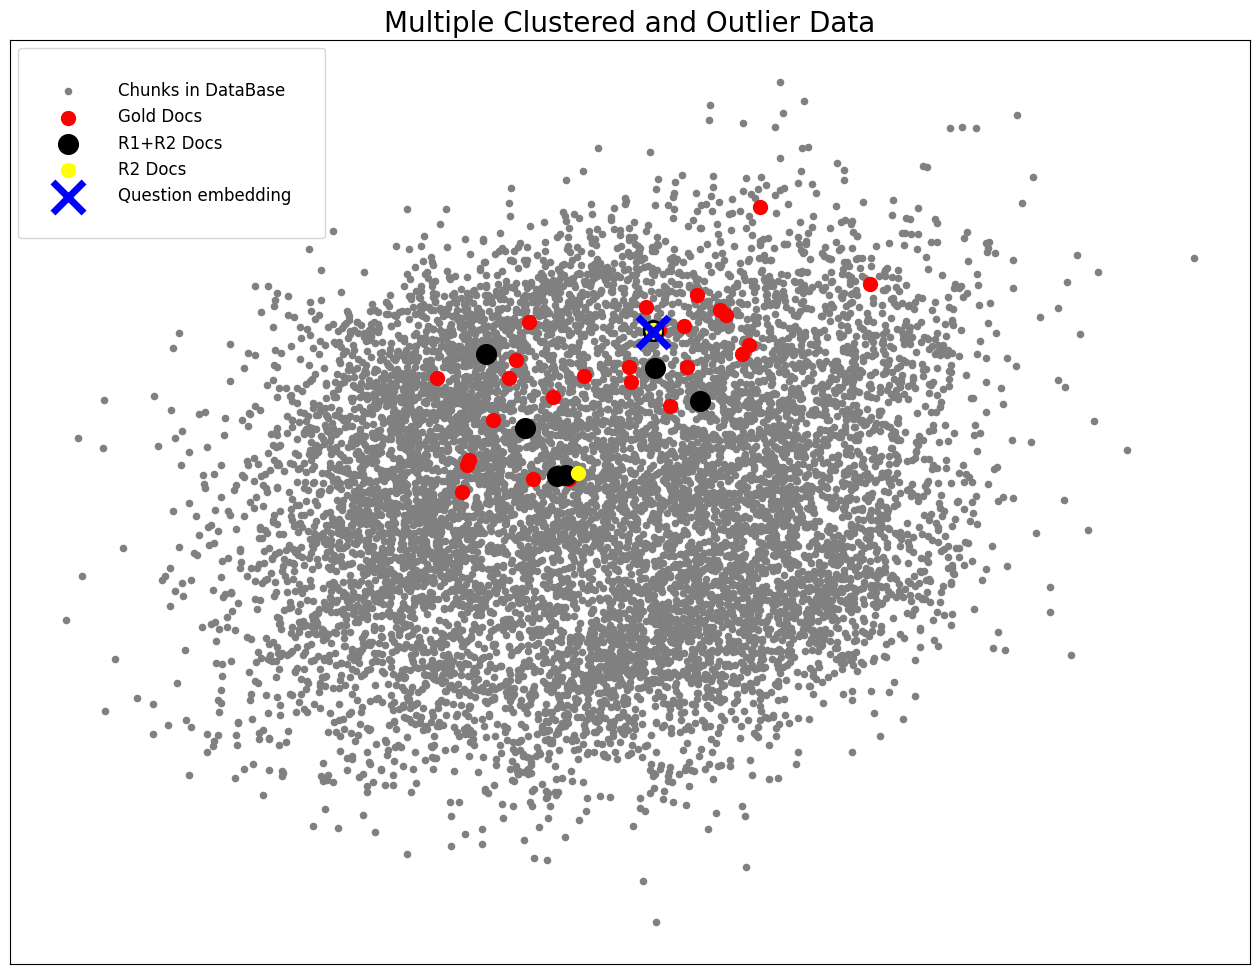

In [214]:
import matplotlib.pyplot as plt

# 可视化
plt.figure(figsize=(16, 12))

# 绘制散点图
plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c='gray', label='Chunks in DataBase', s=20)
plt.scatter(_context_lit_embedding_UMAP[:, 0], _context_lit_embedding_UMAP[:, 1], c='red', label='Gold Docs', s=100)
plt.scatter(_context_em_UMAP[:, 0], _context_em_UMAP[:, 1], c='black', label='R1+R2 Docs', s=200)
plt.scatter(context2_embedding_UMAP[:, 0], context2_embedding_UMAP[:, 1], c='yellow', label='R2 Docs', s=100)
plt.scatter(q_em_UMAP[:, 0], q_em_UMAP[:, 1], c='blue', label='Question embedding', s=500, marker='x', linewidths=5)

# 去除X和Y轴
plt.xticks([])
plt.yticks([])
plt.xlabel('')
plt.ylabel('')

# 设置标题
plt.title('Multiple Clustered and Outlier Data', fontsize=20)

# 设置图例并增加间隔
plt.legend(fontsize=12, handletextpad=2, borderpad=2, loc='best', markerscale=1, frameon=True)

# 隐藏网格线
plt.grid(False)

# 显示图形
plt.show()
